In [1]:
# импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import os
import kagglehub

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# скачивание датасета с Kaggle

In [4]:
path = kagglehub.dataset_download("danielgrijalvas/movies")

In [5]:
path

'/Users/narciss/.cache/kagglehub/datasets/danielgrijalvas/movies/versions/2'

In [6]:
print("Файлы в датасете:")
for file in os.listdir(path): # получаем список всех файлов по дериктории - path - и проходимся по каждому файлу
    print(f"- {file}")

Файлы в датасете:
- movies.csv


In [7]:
movies_df = pd.read_csv(os.path.join(path, "movies.csv")) # os.path.join - способ объединения путей - для правильного прочтения

In [8]:
movies_df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [9]:
movies_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [10]:
# Проверки на пропуски 

In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [12]:
for col in movies_df:
    pct_missing = np.mean(movies_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [13]:
#удаление пропусков

In [14]:
df_clean = movies_df.dropna()

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [16]:
# проверка типов данных

In [17]:
df_clean.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [18]:
df_clean['gross']

0        46998772.0
1        58853106.0
2       538375067.0
3        83453539.0
4        39846344.0
           ...     
7648    426505244.0
7649    319715683.0
7650    245487753.0
7651    111105497.0
7652    461421559.0
Name: gross, Length: 5421, dtype: float64

In [19]:
df_clean['gross'] = df_clean['gross'].astype('int')
df_clean['budget'] = df_clean['budget'].astype('int')
df_clean['votes'] = df_clean['votes'].astype('int')

/var/folders/84/7kvxm12j2_j5ccz9tb2f03n00000gn/T/ipykernel_1594/2645989534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['gross'] = df_clean['gross'].astype('int')
/var/folders/84/7kvxm12j2_j5ccz9tb2f03n00000gn/T/ipykernel_1594/2645989534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['budget'] = df_clean['budget'].astype('int')
/var/folders/84/7kvxm12j2_j5ccz9tb2f03n00000gn/T/ipykernel_1594/2645989534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [20]:
df_clean

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [21]:
df_clean = df_clean.reset_index()

In [22]:
df_clean.sort_values(by=['gross'], ascending= False, inplace = False)

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3731,5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
5302,7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
1795,3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
4730,6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
5158,7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
1378,2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
2286,3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
154,272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [23]:
#pd.set_option('display.max_rows', None) #Как можно вывести все строки, удобнее делать в гугл колаб

In [24]:
df_clean.sort_values(by=['gross'], ascending= False, inplace = False)

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3731,5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
5302,7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
1795,3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
4730,6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
5158,7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
1378,2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
2286,3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
154,272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [25]:
df_clean['company'].drop_duplicates().sort_values(ascending=False) #Уникальные компании 

5101                                thefyzz
3920                            micro_scope
2551                               i5 Films
4834                             i am OTHER
4537                                   erbp
                       ...                 
216                        1818 Productions
1727                          1492 Pictures
1785                        .406 Production
5375    "Weathering With You" Film Partners
2850        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

Какие гипотезы будем проверять?

1. Бюджет имеет высокую корреляцию на финансовый успех фильма 
2. Компания имеет высокую корреляцию 


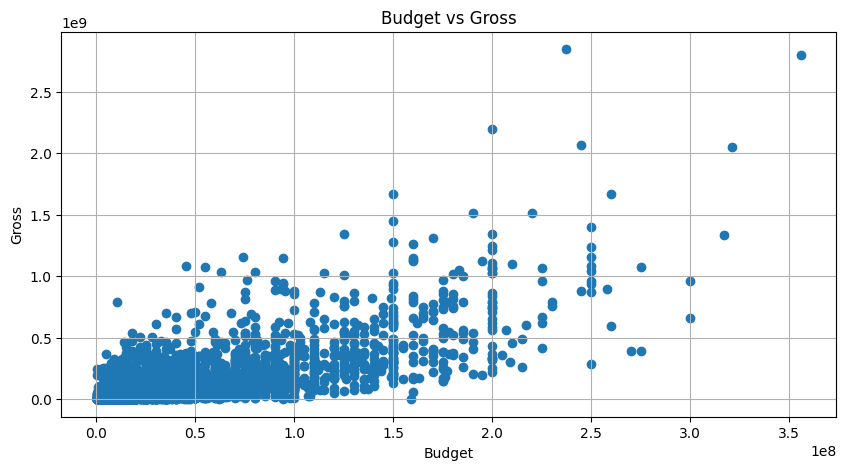

In [30]:
# Scatter plot для бюджета и гросс 
plt.figure(figsize=(10,5))

plt.scatter(x= df_clean['budget'], y= df_clean['gross'])

plt.grid()
plt.title("Budget vs Gross")

plt.xlabel('Budget')
plt.ylabel('Gross')


plt.show()

In [27]:
#pd.reset_option('display.max_rows')

In [28]:
df_clean.sort_values('budget', ascending=False)

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5302,7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
5158,7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
5055,7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0
5046,7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0
3417,5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2211,The Living End,Unrated,Comedy,1992,"August 21, 1992 (United States)",6.5,2900,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,692585,Desperate Pictures,81.0
3466,5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0
1156,2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0
2969,4507,Primer,PG-13,Drama,2004,"May 27, 2005 (Spain)",6.9,101000,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77.0


<Axes: title={'center': 'Correlation - Budget VS Gross'}, xlabel='budget', ylabel='gross'>

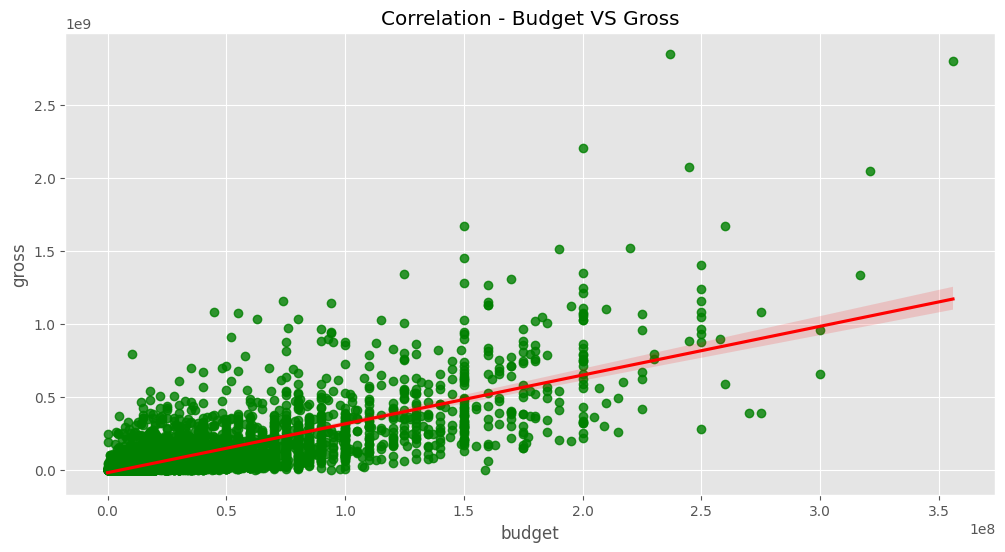

In [39]:
# бюджет и гросс - seaborn
plt.figure(figsize=(12,6))
plt.title('Correlation - Budget VS Gross')
plt.style.use('ggplot')
sns.regplot(x='budget', y='gross', data= df_clean, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})

In [51]:
# подробнее с корреляцией

corr_matrix = df_clean.corr(numeric_only=True) #Pearson, а также есть - kendal,spearman

corr_matrix

,index,year,score,votes,budget,gross,runtime
index,1.000000,0.999522,0.046493,0.192525,0.319194,0.264121,0.067925
year,0.999522,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.046493,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.192525,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.319194,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.264121,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.067925,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Text(120.72222222222221, 0.5, 'Показатели')

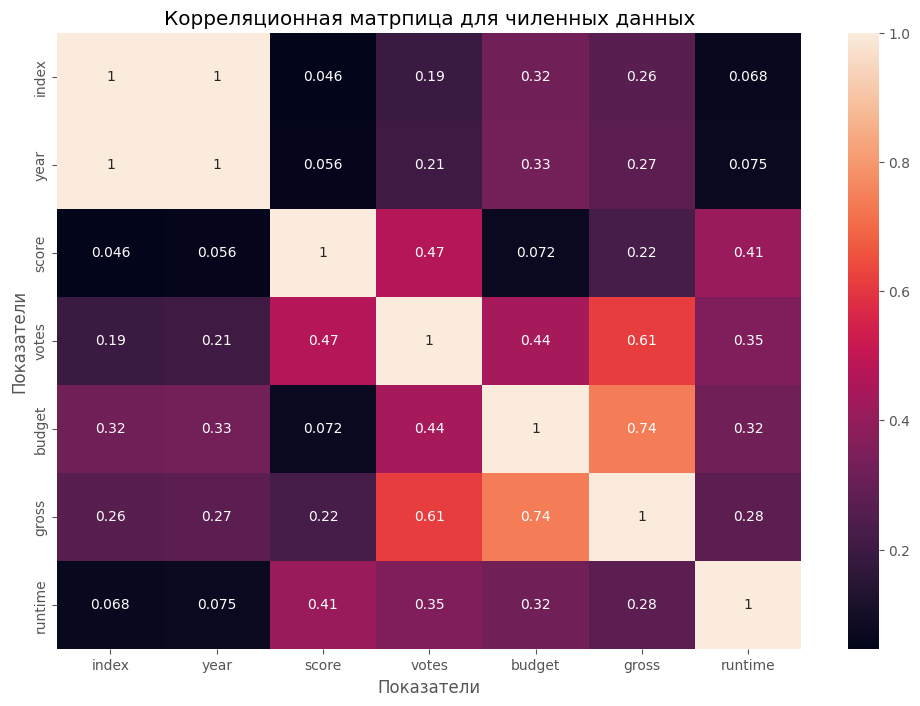

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True)

plt.title('Корреляционная матрпица для чиленных данных')
plt.xlabel('Показатели')
plt.ylabel('Показатели')

In [53]:
#Хочется также посмотреть, как компании влияют на выручку фильма
#Можно присвоить собственные лейблы

In [56]:
df = df_clean
for col_name in df:
    if(df[col_name].dtype == "object"):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

df

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
1,1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
2,2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
3,3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
4,4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0
5417,7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0
5418,7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0
5419,7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0


Text(120.72222222222221, 0.5, 'Показатели')

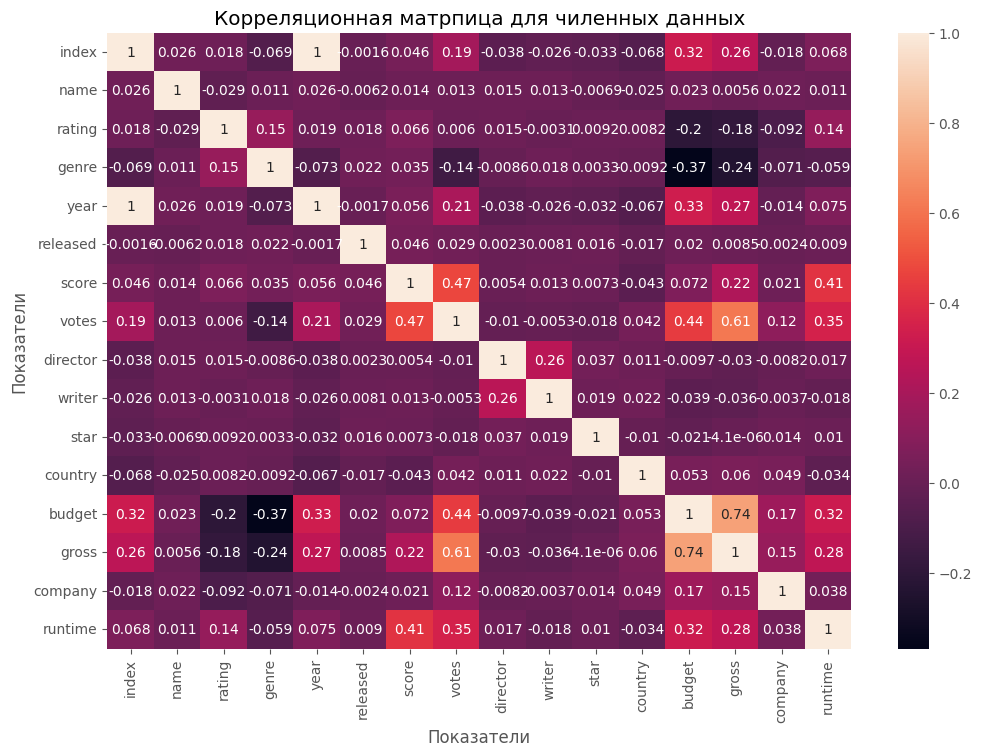

In [57]:
# подробнее с корреляцией

corr_matrix = df.corr(numeric_only=True) #Pearson, а также есть - kendal,spearman

corr_matrix

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True)

plt.title('Корреляционная матрпица для чиленных данных')
plt.xlabel('Показатели')
plt.ylabel('Показатели')

In [58]:
df.corr()

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
index,1.000000,0.026000,0.018488,-0.069474,0.999522,-0.001636,0.046493,0.192525,-0.038165,-0.026044,-0.032773,-0.068233,0.319194,0.264121,-0.017703,0.067925
name,0.026000,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,0.018488,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,-0.069474,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.999522,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.001636,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.046493,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.192525,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,-0.038165,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,-0.026044,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561


In [62]:
correlation_mat = df.corr()
corr_pairs= correlation_mat.unstack()
corr_pairs

index    index      1.000000
         name       0.026000
         rating     0.018488
         genre     -0.069474
         year       0.999522
                      ...   
runtime  country   -0.034477
         budget     0.318695
         gross      0.275796
         company    0.037585
         runtime    1.000000
Length: 256, dtype: float64

In [69]:
sorted_pairs = corr_pairs.sort_values()

with pd.option_context('display.max_rows', None):
    print(sorted_pairs)

#print(sorted_pairs.to_string())

budget    genre      -0.368523
genre     budget     -0.368523
gross     genre      -0.244101
genre     gross      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
gross     rating     -0.181906
rating    gross      -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
year      genre      -0.073167
genre     year       -0.073167
          company    -0.071334
company   genre      -0.071334
genre     index      -0.069474
index     genre      -0.069474
          country    -0.068233
country   index      -0.068233
          year       -0.066748
year      country    -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
year      director   -0.038354
director  year       -0.038354
          index      -0.038165
index     director   -0.038165
gross   

In [70]:
high_corr = sorted_pairs[(sorted_pairs) >0.5]
high_corr

gross     votes       0.614751
votes     gross       0.614751
budget    gross       0.740247
gross     budget      0.740247
year      index       0.999522
index     year        0.999522
          index       1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
name      name        1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64